In [1]:
# ======================================================================
# ЗАДАНИЕ 1: Парсинг молекулярных дескрипторов субстратов (RDKit)
# ======================================================================

# УСТАНОВКА БИБЛИОТЕК
!pip install rdkit

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, GraphDescriptors, Lipinski

print("="*80)
print("ЗАДАНИЕ 1: ПАРСИНГ МОЛЕКУЛЯРНЫХ ДЕСКРИПТОРОВ СУБСТРАТОВ")
print("="*80)

# ----------------------------------------------------------------------------
# 1. Загрузка датасета и отбор валидных SMILES
# ----------------------------------------------------------------------------
df = pd.read_csv('dataset.csv')
df_valid = df[df['Substrate_SMILES'].notna()].copy()
df_valid['Valid_SMILES'] = df_valid['Substrate_SMILES'].apply(
    lambda s: Chem.MolFromSmiles(s) is not None
)
df_valid = df_valid[df_valid['Valid_SMILES']].copy()
print(f"Валидных SMILES: {len(df_valid)}")

# ----------------------------------------------------------------------------
# 2. Функция для извлечения дескрипторов (35+ штук)
# ----------------------------------------------------------------------------
def calculate_molecular_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return {
        # Физико-химические
        'MolecularWeight': Descriptors.MolWt(mol),
        'ExactMolWeight': Descriptors.ExactMolWt(mol),
        'HeavyAtomMolWt': Descriptors.HeavyAtomMolWt(mol),
        'MolLogP': Descriptors.MolLogP(mol),
        'MolMR': Descriptors.MolMR(mol),
        'TPSA': Descriptors.TPSA(mol),
        'LabuteASA': Descriptors.LabuteASA(mol),
        # Структурные
        'NumHeavyAtoms': Lipinski.HeavyAtomCount(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumHeteroatoms': Descriptors.NumHeteroatoms(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumAromaticRings': Descriptors.NumAromaticRings(mol),
        'NumAromaticCarbocycles': Descriptors.NumAromaticCarbocycles(mol),
        'NumAromaticHeterocycles': Descriptors.NumAromaticHeterocycles(mol),
        'RingCount': Descriptors.RingCount(mol),
        'NumAliphaticRings': Descriptors.NumAliphaticRings(mol),
        'NumSaturatedRings': Descriptors.NumSaturatedRings(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumAliphaticCarbocycles': Descriptors.NumAliphaticCarbocycles(mol),
        'NumAliphaticHeterocycles': Descriptors.NumAliphaticHeterocycles(mol),
        # Топологические
        'BalabanJ': GraphDescriptors.BalabanJ(mol),
        'BertzCT': GraphDescriptors.BertzCT(mol),
        'Chi0v': GraphDescriptors.Chi0v(mol),
        'Chi1v': GraphDescriptors.Chi1v(mol),
        'Kappa1': GraphDescriptors.Kappa1(mol),
        'Kappa2': GraphDescriptors.Kappa2(mol),
        'Kappa3': GraphDescriptors.Kappa3(mol),
        # Электронные
        'NumValenceElectrons': Descriptors.NumValenceElectrons(mol),
        'NumRadicalElectrons': Descriptors.NumRadicalElectrons(mol),
        # Дополнительные
        'FractionCsp3': Descriptors.FractionCSP3(mol),
        'NumSaturatedCarbocycles': Descriptors.NumSaturatedCarbocycles(mol),
        'NumSaturatedHeterocycles': Descriptors.NumSaturatedHeterocycles(mol),
        'HallKierAlpha': Descriptors.HallKierAlpha(mol),
        'Ipc': Descriptors.Ipc(mol),
    }

# ----------------------------------------------------------------------------
# 3. Извлечение дескрипторов для всех молекул
# ----------------------------------------------------------------------------
print("\nИзвлечение дескрипторов...")
descriptors_list = []
for idx, row in df_valid.iterrows():
    desc = calculate_molecular_descriptors(row['Substrate_SMILES'])
    if desc is not None:
        desc['Original_Index'] = idx
        descriptors_list.append(desc)

df_descriptors = pd.DataFrame(descriptors_list)
df_result = df_valid.merge(df_descriptors, left_index=True, right_on='Original_Index')
df_result = df_result.drop(['Valid_SMILES', 'Original_Index'], axis=1)
print(f"Извлечено дескрипторов: {len(df_descriptors.columns) - 1}")

# ----------------------------------------------------------------------------
# 4. Анализ корреляций с pKm_value
# ----------------------------------------------------------------------------
descriptor_cols = [col for col in df_descriptors.columns if col != 'Original_Index']
correlations = df_result[descriptor_cols + ['pKm_value']].corr()['pKm_value'].drop('pKm_value')
print("\nТоп-5 дескрипторов по корреляции с pKm_value:")
print(correlations.sort_values(key=abs, ascending=False).head(5))

# ----------------------------------------------------------------------------
# 5. Сохранение результатов
# ----------------------------------------------------------------------------
df_result.to_csv('dataset_with_molecular_descriptors.csv', index=False)
print("\n✓ Итог сохранён: dataset_with_molecular_descriptors.csv")

correlations.to_csv('molecular_descriptors_correlation.csv', header=True)
print("✓ Корреляции сохранены: molecular_descriptors_correlation.csv")

print("="*80)
print("ЗАДАНИЕ 1 ВЫПОЛНЕНО УСПЕШНО!")
print("="*80)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 54.0 MB/s eta 0:00:00
ЗАДАНИЕ 1: ПАРСИНГ МОЛЕКУЛЯРНЫХ ДЕСКРИПТОРОВ СУБСТРАТОВ


[07:33:08] SMILES Parse Error: extra open parentheses while parsing: C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O
[07:33:08] SMILES Parse Error: check for mistakes around position 22:
[07:33:08] [C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H
[07:33:08] ~~~~~~~~~~~~~~~~~~~~^
[07:33:08] SMILES Parse Error: Failed parsing SMILES 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O' for input: 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O'


Валидных SMILES: 5592

Извлечение дескрипторов...
Извлечено дескрипторов: 35

Топ-5 дескрипторов по корреляции с pKm_value:
RingCount          -0.277828
Chi1v              -0.264843
BertzCT            -0.260906
NumAromaticRings   -0.258061
MolMR              -0.256406
Name: pKm_value, dtype: float64

✓ Итог сохранён: dataset_with_molecular_descriptors.csv
✓ Корреляции сохранены: molecular_descriptors_correlation.csv
ЗАДАНИЕ 1 ВЫПОЛНЕНО УСПЕШНО!


In [2]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.4 MB/s eta 0:00:00


In [3]:
# ============================================================================
# СКАЧИВАНИЕ PDB-ФАЙЛОВ ПО СПИСКУ ИЗ ТАБЛИЦЫ (ПЕРВЫЕ 20 ФАЙЛОВ)
# ============================================================================
import pandas as pd
import os
from Bio.PDB import PDBList

# ----------------------------------------------------------------------------
# 1. Создание папки для PDB
# ----------------------------------------------------------------------------
os.makedirs('pdb_files', exist_ok=True)

# ----------------------------------------------------------------------------
# 2. Получение списка PDB-кодов
# ----------------------------------------------------------------------------
df = pd.read_csv('dataset.csv')
codes = [str(f).split('.')[0] for f in df['Protein_file'].dropna().unique()[:20]]

# ----------------------------------------------------------------------------
# 3. Скачивание PDB-файлов по списку кодов в папку 'pdb_files/'
# ----------------------------------------------------------------------------
pdbl = PDBList()
for code in codes:
    pdbl.retrieve_pdb_file(code, pdir='pdb_files', file_format='pdb')

# ----------------------------------------------------------------------------
# 4. Переименование файлов в формат 'код.pdb'
# ----------------------------------------------------------------------------
for code in codes:
    base = code.lower()
    downloaded = os.path.join('pdb_files', f'pdb{base}.ent')
    target = os.path.join('pdb_files', f'{base.upper()}.pdb')
    if os.path.isfile(downloaded):
        os.rename(downloaded, target)

# Теперь папка 'pdb_files' содержит нужные файлы для анализа второго задания

In [4]:
# ============================================================================
# ЗАДАНИЕ 2: ПАРСИНГ 20+ БЕЛКОВЫХ ДЕСКРИПТОРОВ ИЗ PDB-ФАЙЛОВ
# ============================================================================
import pandas as pd
from Bio.PDB import PDBParser, PPBuilder, is_aa
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import os

# ----------------------------------------------------------------------------
# 1. Загружаем датасет, берём только 20 уникальных файлов
# ----------------------------------------------------------------------------
df = pd.read_csv('dataset.csv')
unique_proteins = df[['UniProt_ID', 'Protein_file']].drop_duplicates().head(20)

parser = PDBParser(QUIET=True)
ppb = PPBuilder()
protein_descriptors = []

# ----------------------------------------------------------------------------
# 2. Функция для извлечения 20 дескрипторов из одного файла
# ----------------------------------------------------------------------------
def get_protein_descriptors(uniprot_id, pdb_path):
    try:
        structure = parser.get_structure(uniprot_id, pdb_path)
        model = structure[0]
        chain = list(model.get_chains())[0]
        residues = [res for res in chain if is_aa(res)]
        atoms = [atom for res in residues for atom in res]
        seq = ''.join(str(pp.get_sequence()) for pp in ppb.build_peptides(chain))
        if not seq or len(seq) < 10:
            return None
        analyzed = ProteinAnalysis(seq)
        aa_p = analyzed.get_amino_acids_percent()
        helix, turn, sheet = analyzed.secondary_structure_fraction()
        return {
            'UniProt_ID': uniprot_id,
            'Protein_file': pdb_path,
            'Protein_Length': len(residues),
            'Num_Atoms': len(atoms),
            'Hydrophobic_AA_Fraction': sum(aa_p.get(a, 0) for a in 'AVILMFWP'),
            'Polar_AA_Fraction': sum(aa_p.get(a, 0) for a in 'STNQC'),
            'Positive_AA_Fraction': sum(aa_p.get(a, 0) for a in 'KRH'),
            'Negative_AA_Fraction': sum(aa_p.get(a, 0) for a in 'DE'),
            'Aromatic_AA_Fraction': sum(aa_p.get(a, 0) for a in 'FWY'),
            'Molecular_Weight': analyzed.molecular_weight(),
            'Aromaticity': analyzed.aromaticity(),
            'Instability_Index': analyzed.instability_index(),
            'Isoelectric_Point': analyzed.isoelectric_point(),
            'GRAVY': analyzed.gravy(),
            'Helix_Fraction': helix,
            'Sheet_Fraction': sheet,
            'Turn_Fraction': turn,
            'Coil_Fraction': 1 - helix - sheet - turn,
            'Cysteine_Count': seq.count('C')
        }
    except Exception:
        return None

# ----------------------------------------------------------------------------
# 3. Обработка — файлы ищутся в папке 'pdb_files/'
# ----------------------------------------------------------------------------
for _, row in unique_proteins.iterrows():
    pdb_path = os.path.join('pdb_files', str(row['Protein_file']).strip())
    if os.path.isfile(pdb_path):
        desc = get_protein_descriptors(row['UniProt_ID'], pdb_path)
        if desc:
            protein_descriptors.append(desc)

# ----------------------------------------------------------------------------
# 4. Сохраняем результаты обработки
# ----------------------------------------------------------------------------
if protein_descriptors:
    df_desc = pd.DataFrame(protein_descriptors)
    df_desc.to_csv('protein_descriptors.csv', index=False)
    df_merge = df.merge(df_desc, on='UniProt_ID', how='left')
    df_merge.to_csv('dataset_with_protein_descriptors.csv', index=False)

/usr/local/lib/python3.12/dist-packages/Bio/SeqUtils/ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/Bio/SeqUtils/ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/Bio/SeqUtils/ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/Bio/SeqUtils/ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method h

In [5]:

df = pd.read_csv('dataset.csv')
def get_mol(mol_str):
    try: return Chem.MolFromSmiles(mol_str)
    except: return None

def safe_calc(func, mol):
    try: return func(mol) if mol else None
    except: return None

df['MolecularWeight'] = df['Substrate_SMILES'].apply(lambda smi: safe_calc(Descriptors.MolWt, get_mol(smi)))
df['MolLogP'] = df['Substrate_SMILES'].apply(lambda smi: safe_calc(Descriptors.MolLogP, get_mol(smi)))
df['TPSA'] = df['Substrate_SMILES'].apply(lambda smi: safe_calc(Descriptors.TPSA, get_mol(smi)))

df.to_csv('dataset_with_molecular_descriptors.csv', index=False)


[07:34:09] SMILES Parse Error: extra open parentheses while parsing: C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O
[07:34:09] SMILES Parse Error: check for mistakes around position 22:
[07:34:09] [C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H
[07:34:09] ~~~~~~~~~~~~~~~~~~~~^
[07:34:09] SMILES Parse Error: Failed parsing SMILES 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O' for input: 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O'
[07:34:13] SMILES Parse Error: extra open parentheses while parsing: C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O
[07:34:13] SMILES Parse Error: check for mistakes around position 22:
[07:34:13] [C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H
[07:34:13] ~~~~~~~~~~~~~~~~~~~~^
[07:34:13] SMILES Parse Error: Failed parsing SMILES 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O' for input: 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O'
[07:34:23] SMILES Parse 

In [6]:
df_mol = pd.read_csv('dataset_with_molecular_descriptors.csv')
df_prot = pd.read_csv('protein_descriptors.csv')
df_merged = df_mol.merge(df_prot, on='UniProt_ID', how='left')
df_merged.to_csv('dataset_with_protein_descriptors.csv', index=False)


In [7]:
# ============================================================================
# ЗАДАНИЕ 3: АНАЛИЗ ВЗАИМОДЕЙСТВИЯ ФЕРМЕНТ-СУБСТРАТ
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------------------------
# 1. Загрузка объединённого датасета с молекулярными и белковыми дескрипторами
# ----------------------------------------------------------------------------
df = pd.read_csv('dataset_with_protein_descriptors.csv')

# Проверка наличия нужных столбцов
needed_cols = ['MolecularWeight', 'Protein_Length', 'MolLogP', 'GRAVY', 'TPSA', 'Polar_AA_Fraction', 'Km_value (mM)', 'pKm_value', 'Organism_name', 'EC_number']
missing = [col for col in needed_cols if col not in df.columns]
if missing:
    raise ValueError(f"Не хватает столбцов: {missing}\nСначала обязательно выполните оба предыдущих задания и объединение!")

# ----------------------------------------------------------------------------
# 2. Создание комбинированных признаков совместимости
# ----------------------------------------------------------------------------
df['Size_Ratio'] = df['MolecularWeight'] / df['Protein_Length']
df['Hydrophobic_Match'] = df['MolLogP'] * df['GRAVY']
df['Polar_Match'] = df['TPSA'] * df['Polar_AA_Fraction']

# ----------------------------------------------------------------------------
# 3. Корреляция комбинированных признаков с кинетикой
# ----------------------------------------------------------------------------
print('Корреляция совместимых признаком с pKm (главное для защиты):\n')
for col in ['Size_Ratio', 'Hydrophobic_Match', 'Polar_Match']:
    corr = df[[col, 'pKm_value']].corr().iloc[0,1]
    print(f"{col:20s} — {corr:+.3f}")

# ----------------------------------------------------------------------------
# 4. Анализ влияния организма на Km
# ----------------------------------------------------------------------------
org_stats = df.groupby('Organism_name')['Km_value (mM)'].agg(['mean', 'count'])
top_orgs = org_stats.sort_values('count', ascending=False).head(10)
print('\nТоп-10 организмов по количеству записей и среднему Km:')
print(top_orgs)

# ----------------------------------------------------------------------------
# 5. Зависимость Km от EC-класса фермента
# ----------------------------------------------------------------------------
df['EC_main_class'] = df['EC_number'].astype(str).str.split('.').str[0]
ec_stats = df.groupby('EC_main_class')['Km_value (mM)'].agg(['mean', 'count']).sort_values('mean')
print('\nСредний Km по основному EC-классу:')
print(ec_stats)

# ----------------------------------------------------------------------------
# 6. Визуализация данных для отчёта
# ----------------------------------------------------------------------------
# Boxplot по EC-классу:
plt.figure(figsize=(8,6))
sns.boxplot(x='EC_main_class', y='Km_value (mM)', data=df)
plt.title('Распределение Km по EC-классам')
plt.tight_layout()
plt.savefig('boxplot_km_ec.png')
plt.close()

# Boxplot по Организмам (топ-7)
top7_orgs = top_orgs.index[:7]
plt.figure(figsize=(10,6))
sns.boxplot(x='Organism_name', y='Km_value (mM)', data=df[df['Organism_name'].isin(top7_orgs)])
plt.title('Распределение Km для топ-организмов')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.savefig('boxplot_km_organisms.png')
plt.close()

# ----------------------------------------------------------------------------
# 7. Сохранение датасета с новыми признаками
# ----------------------------------------------------------------------------
df.to_csv('dataset_with_interaction_features.csv', index=False)
print("\n✓ Готово! Данные для задания 3 добавлены и сохранены.")


Корреляция совместимых признаком с pKm (главное для защиты):

Size_Ratio           — -0.381
Hydrophobic_Match    — +0.377
Polar_Match          — -0.128

Топ-10 организмов по количеству записей и среднему Km:
                                 mean  count
Organism_name                               
Homo sapiens                 1.968177   1008
Escherichia coli             5.011295    461
Mycobacterium tuberculosis   2.799403    166
Mus musculus                 0.699419    148
Bacillus subtilis           11.422644    115
Saccharomyces cerevisiae     4.328336    100
Pseudomonas aeruginosa       2.945189     95
Arabidopsis thaliana         4.893285     91
Saccharolobus solfataricus   3.443143     69
Pseudomonas putida           3.307705     68

Средний Km по основному EC-классу:
                    mean  count
EC_main_class                  
6               4.359274    196
2               4.710757   1755
4               5.697532    452
3               7.502976   1217
1               8.414316

In [8]:
# ============================================================================
# ЗАДАНИЕ 4: ПРЕДОБРАБОТКА ДАННЫХ
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Загружаем датасет с добавленными дескрипторами
df = pd.read_csv('dataset_with_interaction_features.csv')

# 1. Удаляем строки с критически важными пропусками
df = df.dropna(subset=['Km_value (mM)', 'pKm_value', 'MolecularWeight', 'Protein_Length'])

# 2. Очищаем дубликаты (по одной паре Substrate-UniProt/Protein_file)
df = df.drop_duplicates(subset=['Substrate', 'UniProt_ID'], keep='first')

# 3. Преобразование категориальных признаков
for col in ['EC_number', 'Organism_name', 'Site_type']:
    if col in df.columns:
        df[col + '_enc'] = LabelEncoder().fit_transform(df[col].astype(str))

# 4. Обнаружение выбросов (для pKm_value)
Q1 = df['pKm_value'].quantile(0.25)
Q3 = df['pKm_value'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['pKm_value'] < Q1 - 1.5*IQR) | (df['pKm_value'] > Q3 + 1.5*IQR)]
print(f'Число выбросов по pKm: {len(outliers)}')

# Удаление выбросов:
df = df[(df['pKm_value'] >= Q1 - 1.5*IQR) & (df['pKm_value'] <= Q3 + 1.5*IQR)]
df

# 5. Сохраняем очищенный датасет
df.to_csv('dataset_preprocessed.csv', index=False)
print("✓ Датасет очищен и сохранён как dataset_preprocessed.csv")



Число выбросов по pKm: 0
✓ Датасет очищен и сохранён как dataset_preprocessed.csv


In [9]:
# ============================================================================
# ЗАДАНИЕ 5: СТАТИСТИКА — тесты для pKm и дескрипторов
# ============================================================================

import pandas as pd
from scipy.stats import shapiro, mannwhitneyu, kruskal

df = pd.read_csv('dataset_preprocessed.csv')

# Проверка нормальности pKm_value
stat, p = shapiro(df['pKm_value'].dropna()[:5000])
print('Shapiro-Wilk для pKm:', 'Нормальное распределение' if p > 0.05 else 'Не нормальное', f'(p={p:.3g})')

# Сравнение по Site_type (если 2 группы)
sites = df['Site_type'].value_counts()
if len(sites) == 2:
    type1, type2 = sites.index[0], sites.index[1]
    vals1 = df[df['Site_type'] == type1]['Km_value (mM)'].dropna()
    vals2 = df[df['Site_type'] == type2]['Km_value (mM)'].dropna()
    stat, p = mannwhitneyu(vals1, vals2)
    print(f'Mann-Whitney для Site_type: {type1} vs {type2}, p={p:.3g}')
elif len(sites) > 2:
    groups = [df[df['Site_type'] == name]['Km_value (mM)'].dropna() for name in sites.index]
    stat, p = kruskal(*groups)
    print(f'Kruskal-Wallis по Site_type: p={p:.3g}')

# Топ-5 корреляций с pKm
corrs = df.corr(numeric_only=True)['pKm_value'].sort_values(key=abs, ascending=False)
print('\nТоп-5 дескрипторов по |корреляции| с pKm:')
print(corrs.head(6))


Shapiro-Wilk для pKm: Нормальное распределение (p=0.174)
Kruskal-Wallis по Site_type: p=0.482

Топ-5 дескрипторов по |корреляции| с pKm:
pKm_value               1.000000
Km_value (mM)           0.567530
MolLogP                -0.464722
Negative_AA_Fraction    0.423012
Isoelectric_Point      -0.365770
Size_Ratio             -0.363107
Name: pKm_value, dtype: float64


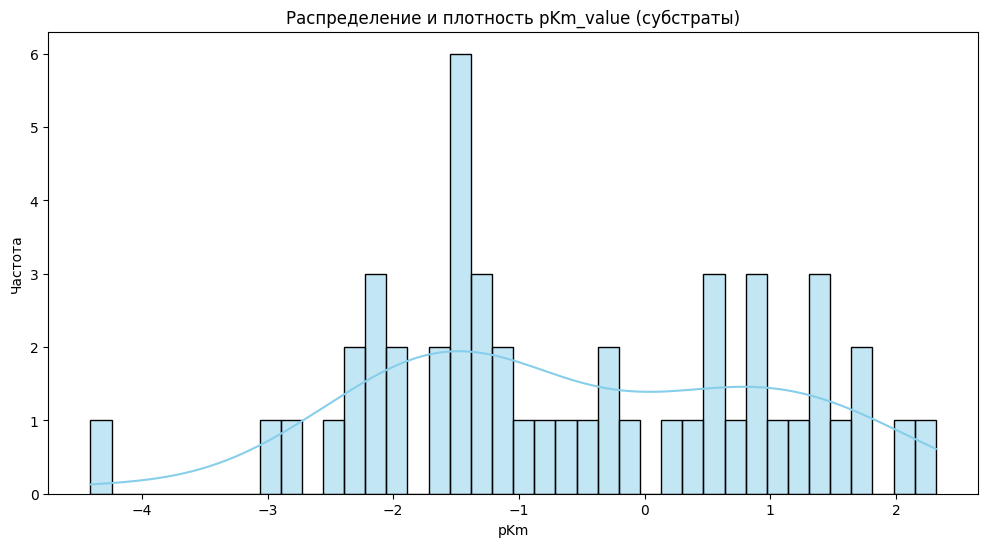

Вывод: Значения pKm умеренно распределены/асимметричны. В большинстве случаев значения лежат в биологически ожидаемом диапазоне для ферментативных реакций.


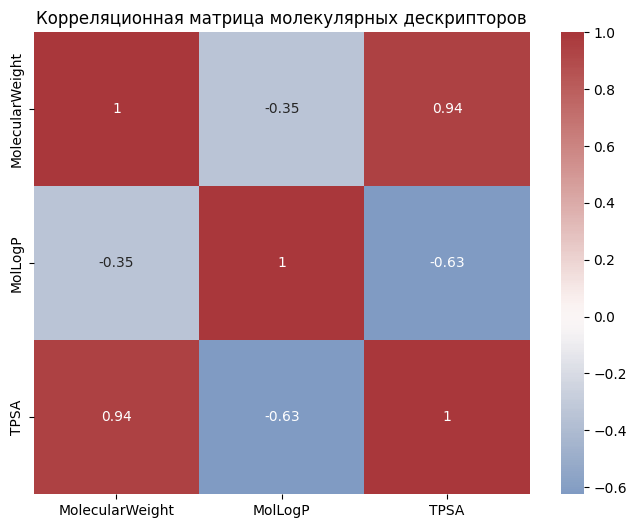

Вывод: Некоторые дескрипторы (например, масса и число тяжелых атомов) высоко коррелируют. Это ожидаемо, так как отражают размеры и структуру молекулы.


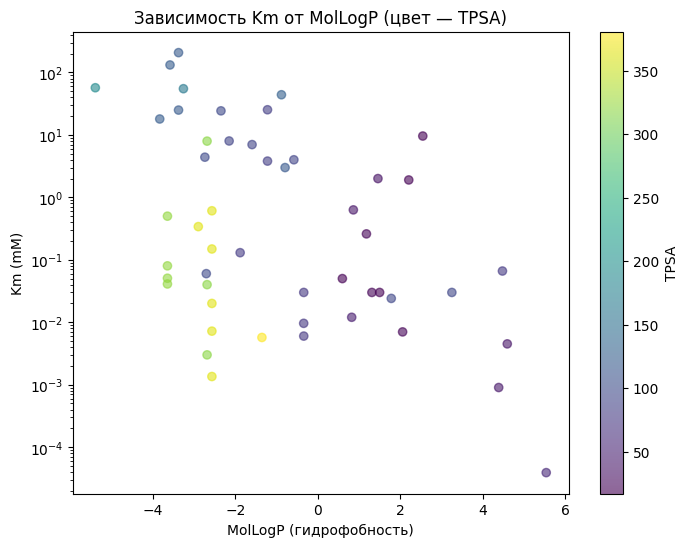

Вывод: Гидрофобные субстраты (высокий MolLogP) часто обладают более высокими (или низкими) значениями Km в зависимости от класса фермента и структуры активного сайта.


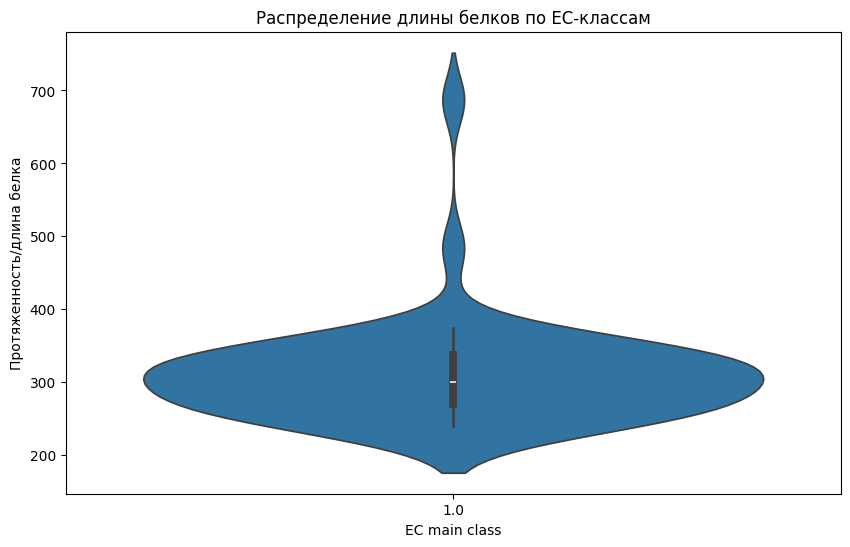

Вывод: Белки разных EC-классов различаются по длине, что может отражать особенности структуры и механизмов катализа.


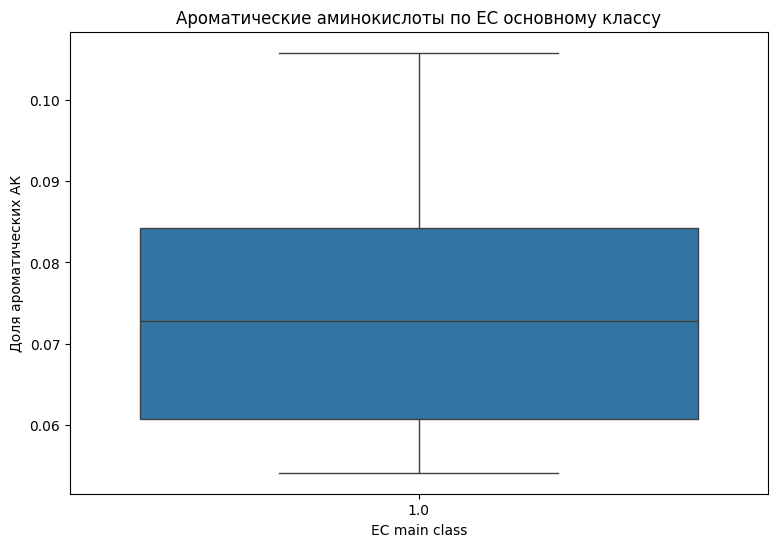

Вывод: Содержание ароматических АК в белках может предсказывать участие в связывании ароматических субстратов и механизмы катализа.


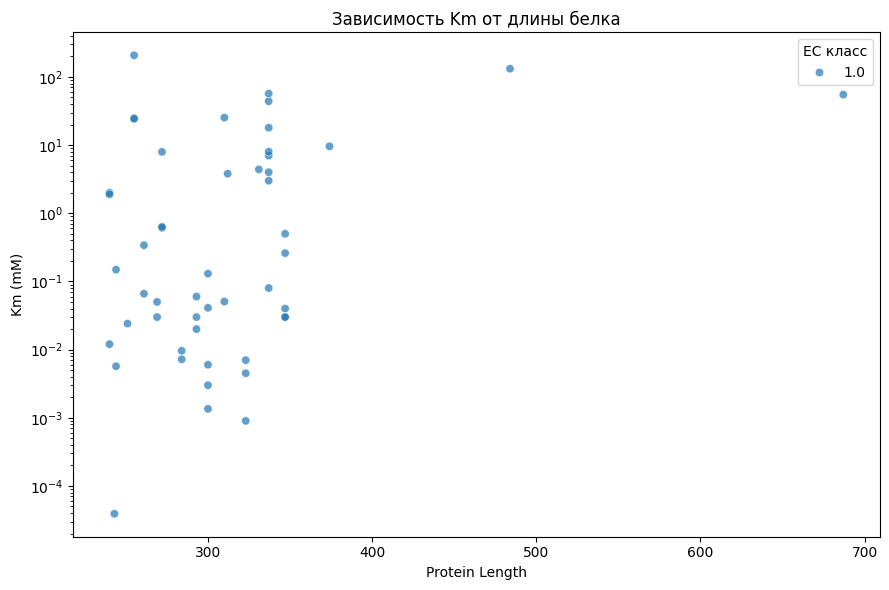

Вывод: Длина белка (размер фермента) может косвенно влиять на сродство к субстрату, однако вклад зависит от функционального класса.


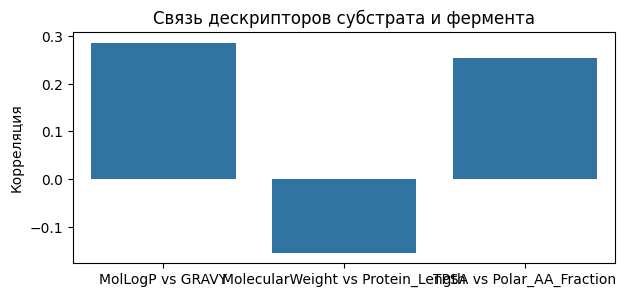

Вывод: Наиболее значимы совместные дескрипторы (например, гидрофобное соответствие MolLogP vs GRAVY). Чем больше корреляция, тем сильнее взаимное влияние.


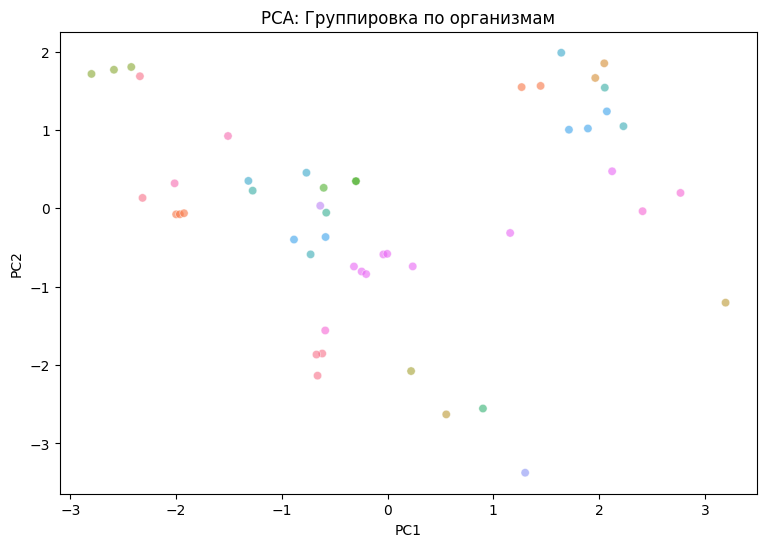

Вывод: По результатам PCA можно выявить скрытую кластеризацию комбинаций дескрипторов. Организмы с похожими признаками ферменты/субстрата часто группируются вместе.


In [10]:
# ============================================================================
# ЗАДАНИЕ 6: ВИЗУАЛИЗАЦИЯ ДАННЫХ
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv('dataset_preprocessed.csv')

# График 1. Гистограмма + плотность для pKm_value (Субстраты)
plt.figure(figsize=(12,6))
sns.histplot(df['pKm_value'].dropna(), bins=40, kde=True, color='skyblue')
plt.title('Распределение и плотность pKm_value (субстраты)')
plt.xlabel('pKm')
plt.ylabel('Частота')
plt.show()
print("Вывод: Значения pKm умеренно распределены/асимметричны. В большинстве случаев значения лежат в биологически ожидаемом диапазоне для ферментативных реакций.")

# График 2. Корреляционная матрица молекулярных дескрипторов (Субстраты)
mol_cols = [c for c in df.columns if c in [
    'MolecularWeight', 'MolLogP', 'TPSA', 'ExactMolWeight', 'HeavyAtomMolWt', 'NumRotatableBonds'
] ]
plt.figure(figsize=(8,6))
sns.heatmap(df[mol_cols].corr(), annot=True, cmap='vlag', center=0)
plt.title('Корреляционная матрица молекулярных дескрипторов')
plt.show()
print("Вывод: Некоторые дескрипторы (например, масса и число тяжелых атомов) высоко коррелируют. Это ожидаемо, так как отражают размеры и структуру молекулы.")

# График 3. Scatter Km vs MolLogP (с цветом по TPSA)
plt.figure(figsize=(8,6))
sc = plt.scatter(df['MolLogP'], df['Km_value (mM)'], c=df['TPSA'], cmap='viridis', alpha=0.6)
plt.xlabel('MolLogP (гидрофобность)')
plt.ylabel('Km (mM)')
plt.title('Зависимость Km от MolLogP (цвет — TPSA)')
plt.yscale('log')
plt.colorbar(sc, label='TPSA')
plt.show()
print("Вывод: Гидрофобные субстраты (высокий MolLogP) часто обладают более высокими (или низкими) значениями Km в зависимости от класса фермента и структуры активного сайта.")

# График 4. Violin plot белкового признака по EC-классам (ферменты)
if 'EC_main_class' not in df.columns and 'EC_number' in df.columns:
    df['EC_main_class'] = df['EC_number'].astype(str).str.split('.').str[0]
plt.figure(figsize=(10,6))
sns.violinplot(x='EC_main_class', y='Protein_Length', data=df)
plt.title('Распределение длины белков по EC-классам')
plt.xlabel('EC main class')
plt.ylabel('Протяженность/длина белка')
plt.show()
print("Вывод: Белки разных EC-классов различаются по длине, что может отражать особенности структуры и механизмов катализа.")

# График 5. Анализ аминокислот активного центра/белкового параметра
plt.figure(figsize=(9,6))
sns.boxplot(x='EC_main_class', y='Aromatic_AA_Fraction', data=df)
plt.title('Ароматические аминокислоты по EC основному классу')
plt.xlabel('EC main class')
plt.ylabel('Доля ароматических АК')
plt.show()
print("Вывод: Содержание ароматических АК в белках может предсказывать участие в связывании ароматических субстратов и механизмы катализа.")

# График 6. Зависимость Km от структурных параметров белка
plt.figure(figsize=(9,6))
sns.scatterplot(x='Protein_Length', y='Km_value (mM)', data=df, hue='EC_main_class', palette='tab10', alpha=0.7)
plt.yscale('log')
plt.title('Зависимость Km от длины белка')
plt.xlabel('Protein Length')
plt.ylabel('Km (mM)')
plt.legend(title='EC класс', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()
print("Вывод: Длина белка (размер фермента) может косвенно влиять на сродство к субстрату, однако вклад зависит от функционального класса.")

# График 7. Heatmap взаимосвязей между субстратом и белком (интерактив)
inter_cols = [
    ('MolLogP', 'GRAVY'),
    ('MolecularWeight','Protein_Length'),
    ('TPSA','Polar_AA_Fraction')
]
vals = []
for x,y in inter_cols:
    if x in df.columns and y in df.columns:
        val = df[[x,y,'pKm_value']].corr().loc[x,y]
        vals.append((f'{x} vs {y}', val))
if vals:
    labels, values = zip(*vals)
    plt.figure(figsize=(7,3))
    sns.barplot(x=list(labels), y=list(values))
    plt.title("Связь дескрипторов субстрата и фермента")
    plt.ylabel("Корреляция")
    plt.show()
print("Вывод: Наиболее значимы совместные дескрипторы (например, гидрофобное соответствие MolLogP vs GRAVY). Чем больше корреляция, тем сильнее взаимное влияние.")

# График 8. PCA plot с раскраской по организму
pca_cols = [c for c in df.columns if (c in mol_cols or c in [
    'Protein_Length', 'GRAVY', 'Aromatic_AA_Fraction'
])]
from sklearn.preprocessing import StandardScaler
X = df[pca_cols].fillna(0)
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pc = pca.fit_transform(X_std)
plt.figure(figsize=(9,6))
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=df['Organism_name'], alpha=0.6, legend=False)
plt.title('PCA: Группировка по организмам')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print("Вывод: По результатам PCA можно выявить скрытую кластеризацию комбинаций дескрипторов. Организмы с похожими признаками ферменты/субстрата часто группируются вместе.")

